In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [12]:
df['stress_level'].value_counts()

stress_level
0    373
2    369
1    358
Name: count, dtype: int64

<Axes: >

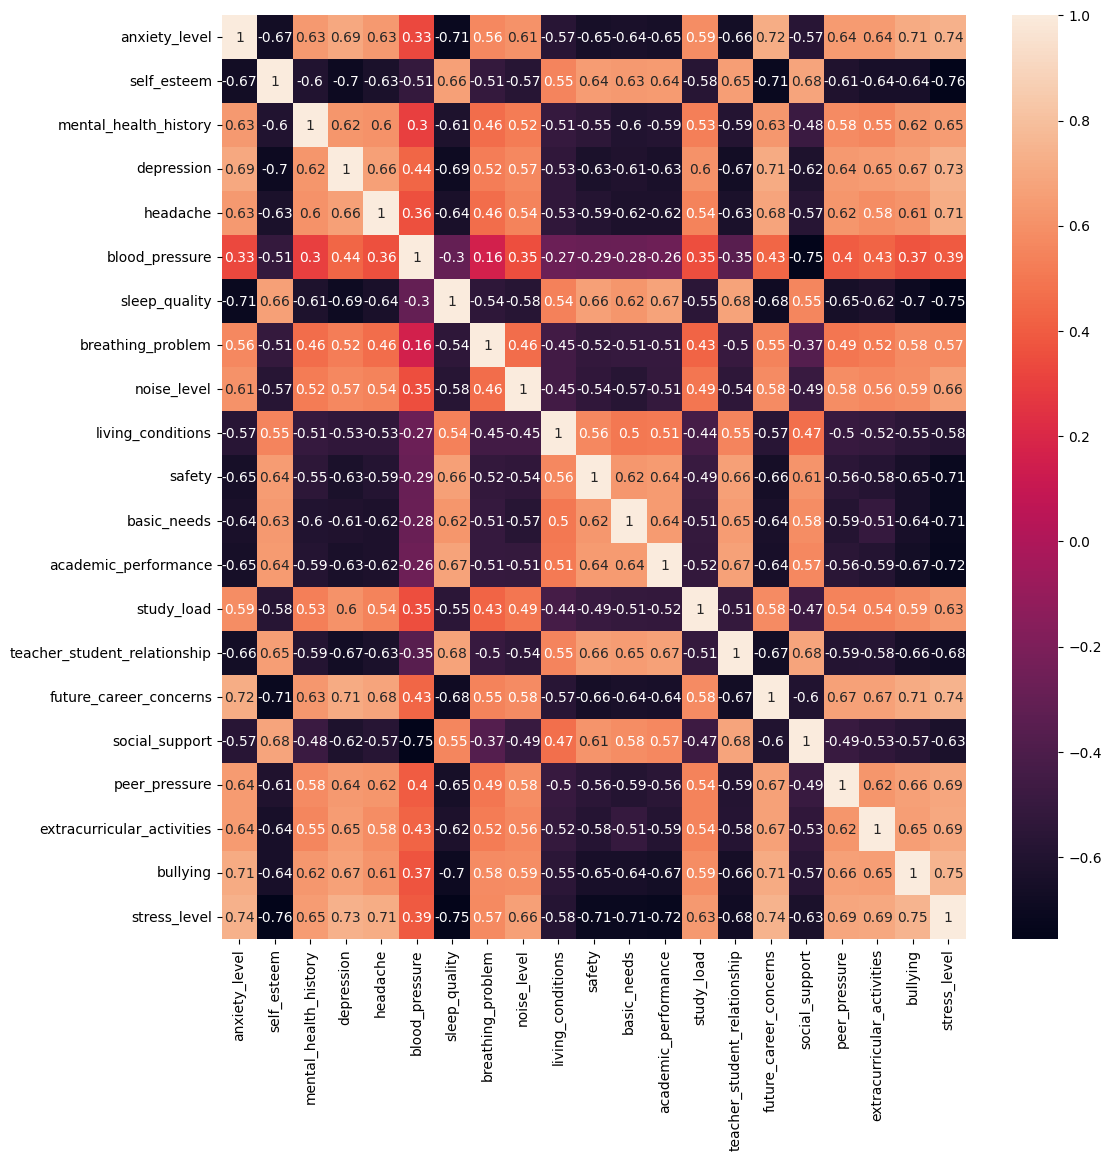

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['stress_level'], axis=1)
y = df['stress_level']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, stratify=y, random_state=42)

In [22]:
logistic = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
logistic.fit(X_train, y_train)

d:\Machine Learning\Machine-Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Machine Learning\Machine-Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

In [23]:
y_pred = logistic.predict(X_test)

In [25]:
y_pred

array([1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1,
       1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1,
       2, 0, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2,
       1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2,
       0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0,

In [38]:
accuracy = accuracy_score(y_test, y_pred)
cnm = confusion_matrix(y_test, y_pred)
clf = classification_report(y_test, y_pred)
print("Accuracy : ",accuracy)
print(cnm)
print(clf)

Accuracy :  0.8787878787878788
[[98  7  7]
 [ 7 94  6]
 [ 9  4 98]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       112
           1       0.90      0.88      0.89       107
           2       0.88      0.88      0.88       111

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330

